<a href="https://colab.research.google.com/github/gsrroot/stockMarket-analysis/blob/main/Stock_Market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

# New Section

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. To run all the code in the notebook, select **Runtime** > **Run all**. To run the code cells one at a time, hover over each cell and select the **Run cell** icon.

![Run cell icon](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/images/beginner/run_cell_icon.png?raw=1)

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.14.0


In [ ]:
!pip install -q yfinance

In [ ]:
import pandas as panda
import numpy as nump

import matplotlib.pyplot as pylt
import seaborn as seans
seans.set_style('whitegrid')
pylt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf

from datetime import datetime

In [ ]:
# The tech stocks we'll use for this analysis
technicalList = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and starting times for data grab
technicalList = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

ending = datetime.now()
starting = datetime(ending.year - 1, ending.month, ending.day)

for stock in technicalList:
    globals()[stock] = yf.download(stock, starting, ending)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# for company, company_name in zip(company_list, technicalList):
#     company["company_name"] = company_name


In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

dataFrame = panda.concat(company_list, axis=0)
dataFrame.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-21,143.910004,144.050003,141.500000,143.899994,143.899994,71226000,AMAZON
2023-11-22,144.570007,147.740005,144.570007,146.710007,146.710007,45669100,AMAZON
2023-11-24,146.699997,147.199997,145.320007,146.740005,146.740005,22378400,AMAZON
2023-11-27,147.529999,149.259995,146.880005,147.729996,147.729996,53762400,AMAZON
2023-11-28,146.979996,147.600006,145.529999,147.029999,147.029999,42711700,AMAZON
2023-11-29,147.850006,148.539993,145.970001,146.320007,146.320007,40610900,AMAZON
2023-11-30,144.759995,146.929993,144.330002,146.089996,146.089996,65814000,AMAZON
2023-12-01,146.000000,147.250000,145.550003,147.029999,147.029999,39924600,AMAZON
2023-12-04,145.250000,145.350006,142.809998,144.839996,144.839996,48294200,AMAZON


In [ ]:
#Summary stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,168.215140,169.839243,166.845976,168.437570,167.957070,6.122363e+07
std,18.593253,18.429958,18.753529,18.590642,18.749684,1.859151e+07
min,126.010002,127.769997,124.169998,125.019997,124.325081,2.404830e+07
25%,153.309998,154.904999,151.150002,153.770004,153.148766,4.883255e+07
50%,173.050003,174.229996,171.690002,173.559998,172.868774,5.674310e+07
75%,181.815002,183.669998,180.065002,181.905006,181.543121,6.850900e+07
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.601569e+08


In [ ]:
#General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-12-06 to 2023-12-05
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [ ]:
dataFrame.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [ ]:
AAPL.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

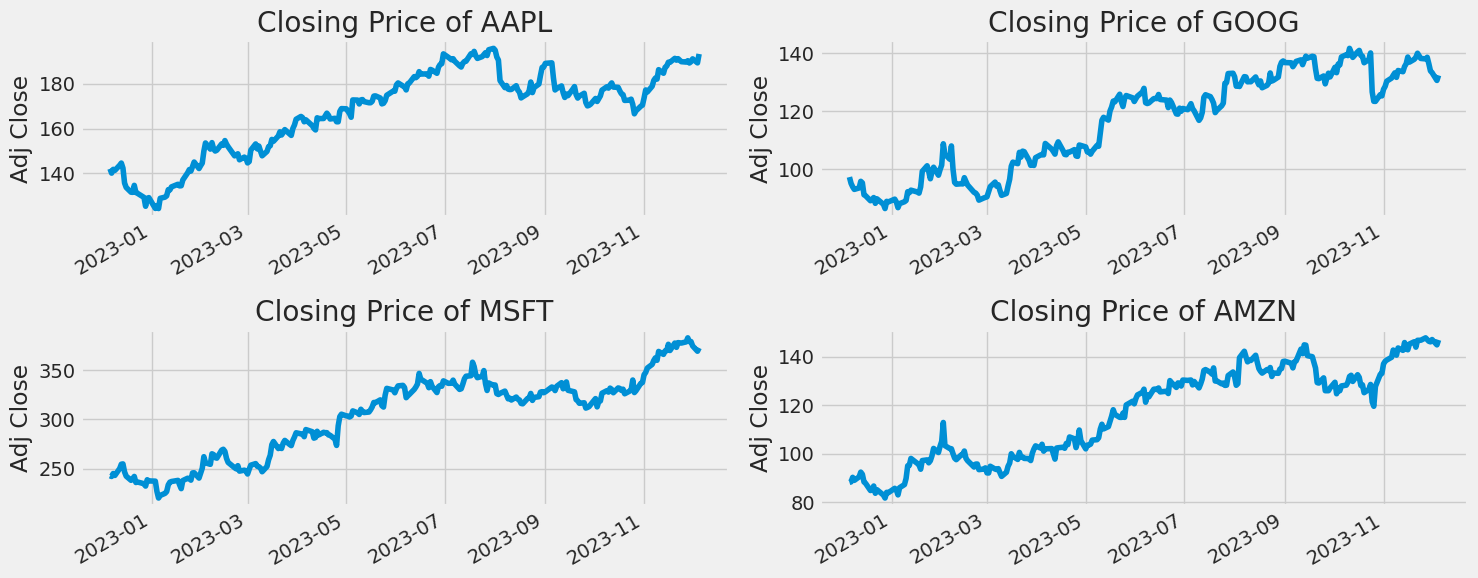

In [ ]:
#Let's see a historical veiw of the closing price

pylt.figure(figsize=(15, 6))
pylt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  pylt.subplot(2, 2, i)
  company['Adj Close'].plot()
  pylt.ylabel('Adj Close')
  pylt.xlabel(None)
  pylt.title(f"Closing Price of {technicalList[i-1]}")

pylt.tight_layout()



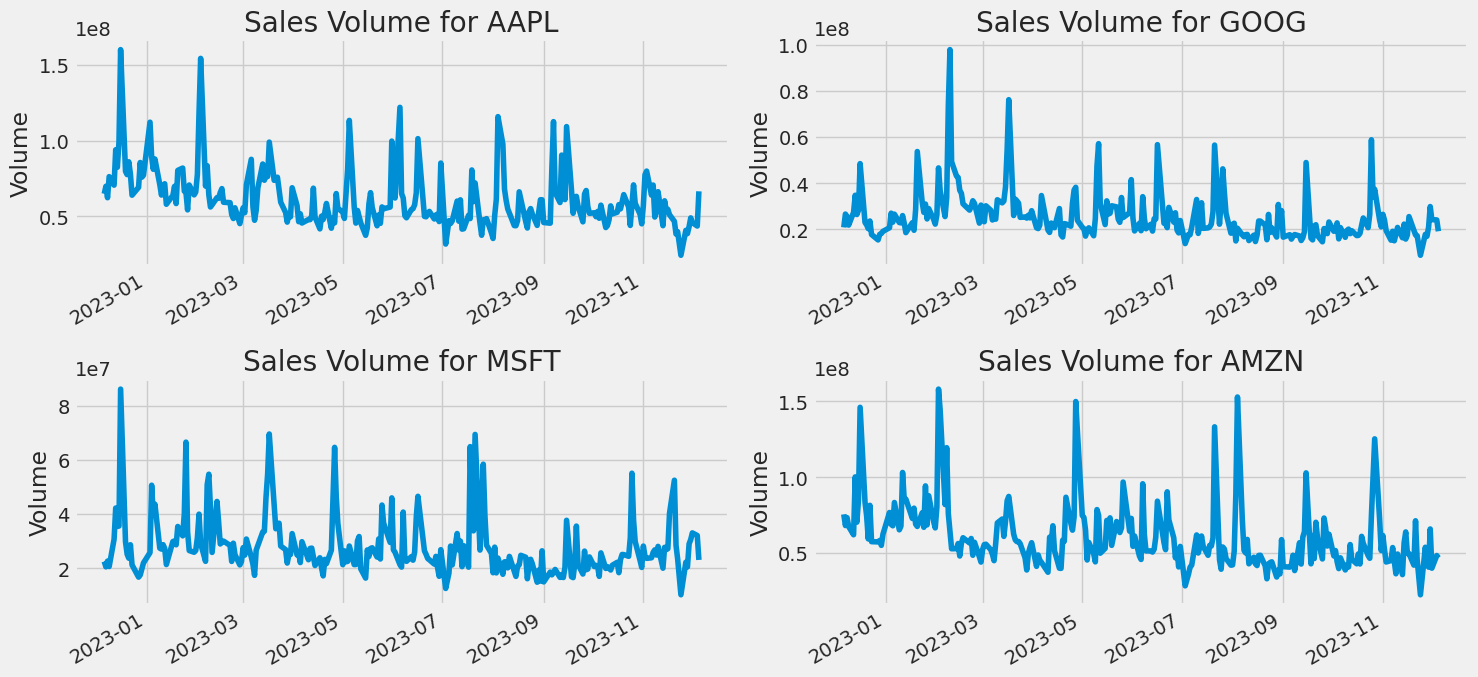

In [ ]:
# Now let's plot the total volume of stock being traded each day

pylt.figure(figsize=(15, 7))
pylt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    pylt.subplot(2, 2, i)
    company['Volume'].plot()
    pylt.ylabel('Volume')
    pylt.xlabel(None)
    pylt.title(f"Sales Volume for {technicalList[i - 1]}")

pylt.tight_layout()


In [ ]:
my_dayy = [10, 20, 50]

for ma in my_dayy:
  for company in company_list:
    coloumn_name = f"MA for {ma} days"
    company[coloumn_name] = company['Adj Close'].rolling(ma).mean()


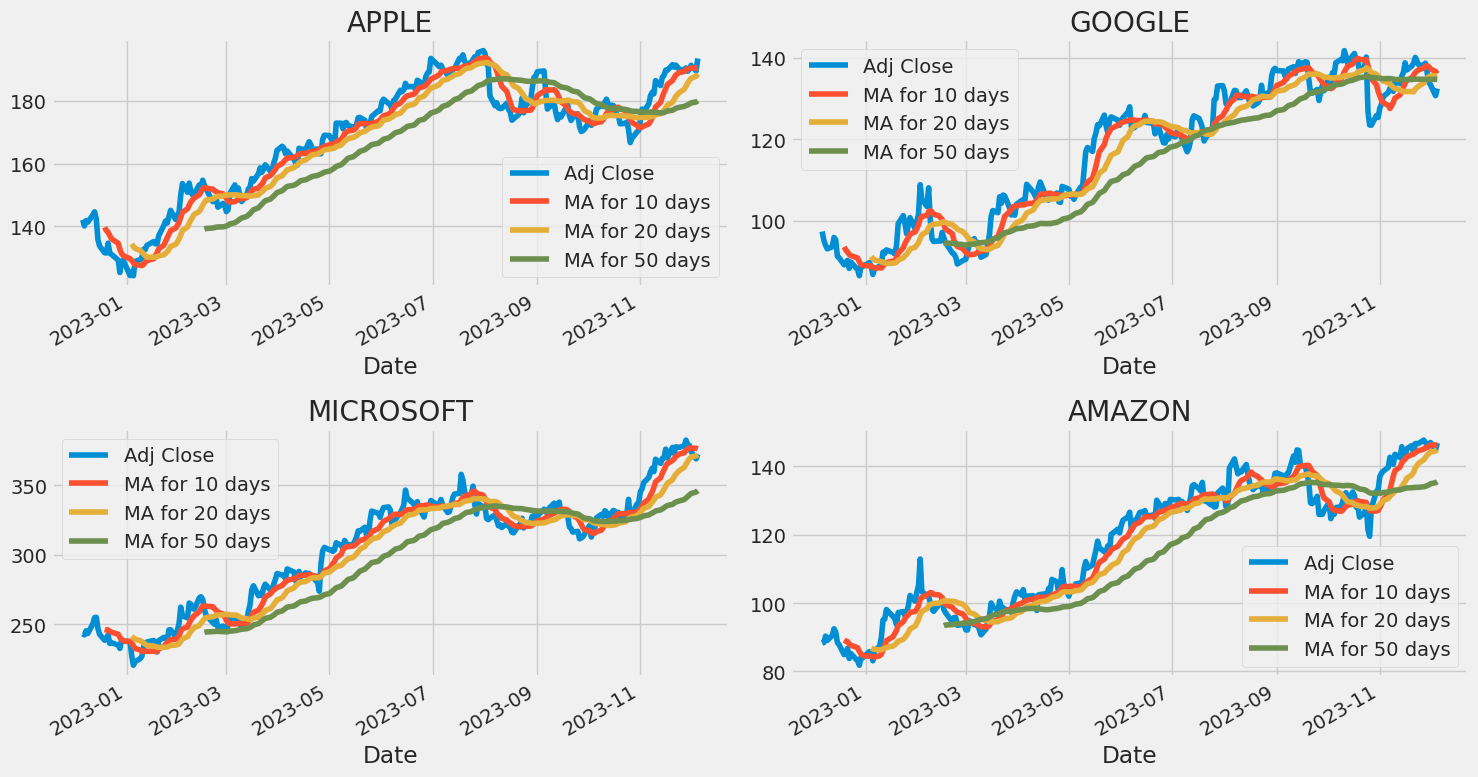

In [ ]:
fig, axes = pylt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()




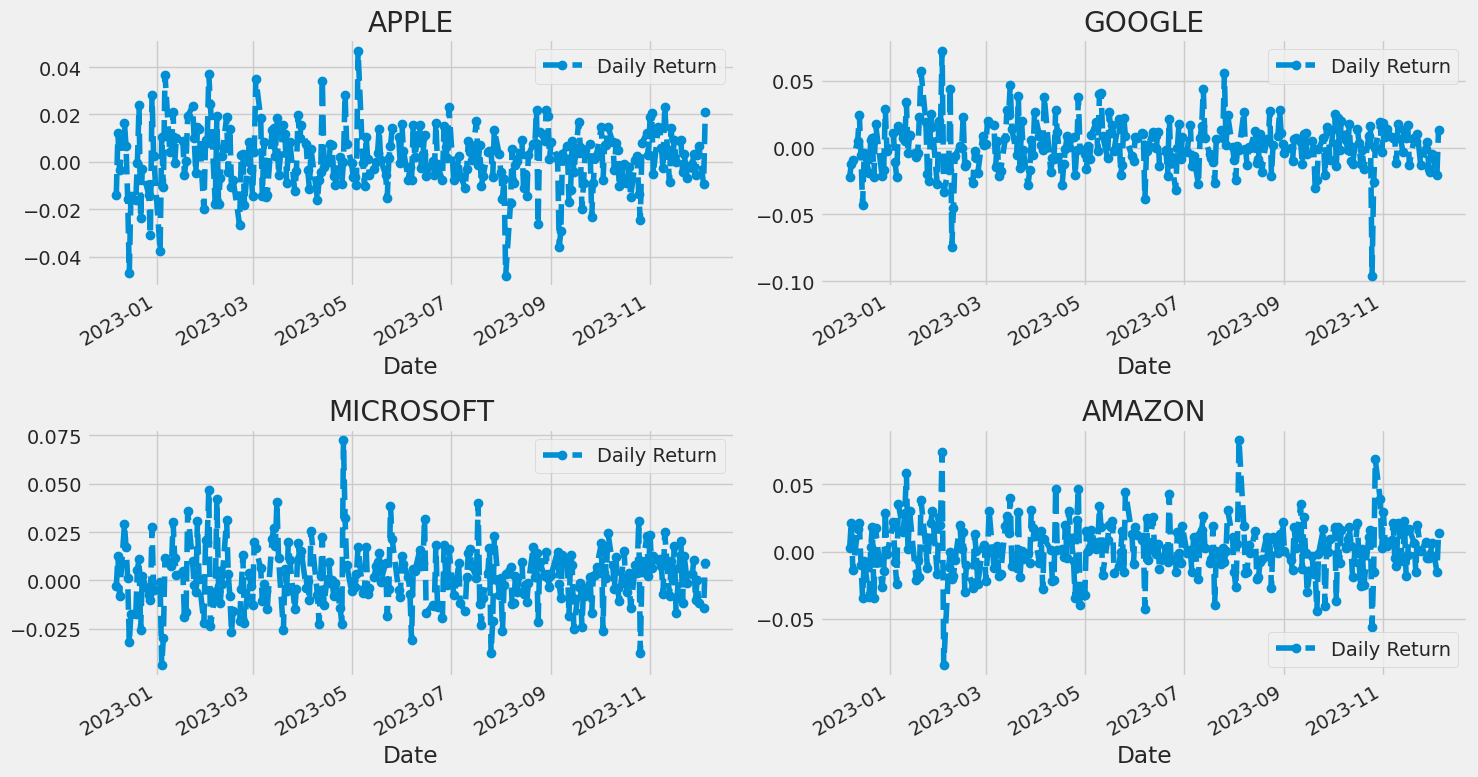

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = pylt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


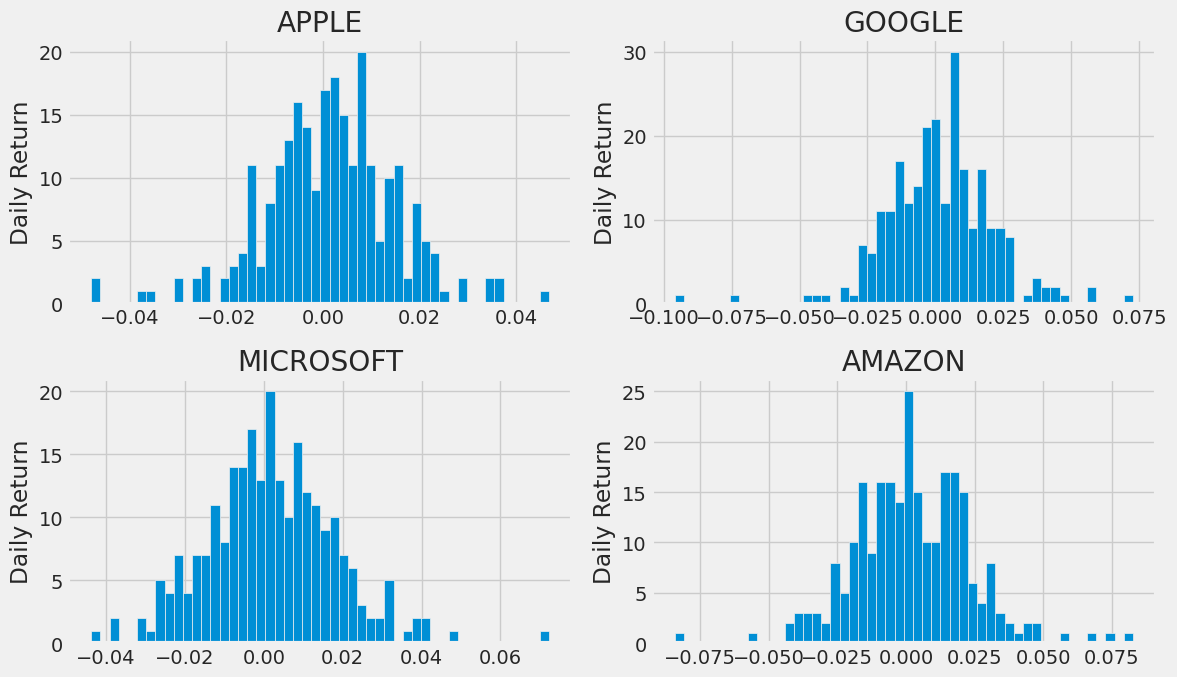

In [ ]:
pylt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    pylt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    pylt.ylabel('Daily Return')
    pylt.title(f'{company_name[i - 1]}')

pylt.tight_layout()